In [1]:
import snowflake.connector
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
ctx = snowflake.connector.connect(
    user='',
    password='',
    account=''
)
cs = ctx.cursor()

ctx.cursor().execute("use role sysadmin")
ctx.cursor().execute("use warehouse COMPUTE_WH")
ctx.cursor().execute("use database NORTHPOOL")
ctx.cursor().execute("use schema ASSIGNMENTB")

In [3]:
try:
    sql = 'SELECT * FROM "production_wind";'
    cs.execute(sql)
    df = cs.fetch_pandas_all()
finally:
    cs.close()
ctx.close()

df = df.drop(['datetime_start_nl', 'datetime_end_nl', 'datetime_start_ntz', 'area_type'], axis=1)

df = df.dropna(axis=0, subset=['production_mw'])

In [4]:
df = df.sort_values('datetime_start_utc')

In [5]:
df

,datetime_start_utc,datetime_end_utc,provider,area_code,interval,energy_source,phase,production_mw,datetime_modification_utc,datetime_fetch,datetime_load_snowflake,datetime_load_businessvault,datetime_load_reporting
2468,2019-12-31 23:00:00,2020-01-01 00:00:00,ENTSOE_FTP,DK2,60,WIND-OFFSHORE,A,118.77,2020-01-01 02:16:15,2021-06-24 11:28:58.189000,2021-06-24 11:28:58.189,2021-11-11 12:18:58.755,2021-11-11 16:12:37.378
34235,2019-12-31 23:00:00,2020-01-01 00:00:00,ENTSOE_FTP,SK,60,WIND-ONSHORE,FC1,1.00,2019-12-31 17:18:00,2021-06-24 11:52:26.148000,2021-06-24 11:52:26.148,2021-11-11 12:18:58.755,2021-11-11 16:12:37.378
1344,2019-12-31 23:00:00,2020-01-01 00:00:00,ENTSOE_FTP,PL,60,WIND-ONSHORE,FC1,2316.23,2019-12-31 17:47:16,2021-06-24 11:52:26.148000,2021-06-24 11:52:26.148,2021-11-11 12:18:58.755,2021-11-11 16:12:37.378
27314,2019-12-31 23:00:00,2020-01-01 00:00:00,EEX,GB,60,WIND-OFFSHORE,A,154.50,2020-01-01 00:55:17,2021-09-22 12:01:14.615000,2021-09-22 16:35:26.103,2021-11-11 13:05:52.903,2021-11-11 16:12:37.378
31012,2019-12-31 23:00:00,2020-01-01 00:00:00,ENTSOE_FTP,SE3,60,WIND-ONSHORE,FC1,1505.78,2019-12-31 18:16:40,2021-06-24 11:52:26.148000,2021-06-24 11:52:26.148,2021-11-11 12:18:58.755,2021-11-11 16:12:37.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7388,2021-11-13 23:30:00,2021-11-13 23:45:00,ENTSOE_FTP,HU,15,WIND-ONSHORE,FC1,4.15,2021-11-13 05:48:32,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433
32430,2021-11-13 23:30:00,2021-11-13 23:45:00,ENTSOE_FTP,AT,15,WIND-ONSHORE,FC1,128.00,2021-11-12 11:03:07,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433
25514,2021-11-13 23:45:00,2021-11-14 00:00:00,APG,AT,15,WIND-ONSHORE,FC1,132.00,NaT,2021-11-13 05:11:24.621850,2021-11-13 05:36:03.241,2021-11-13 05:58:56.722,2021-11-13 06:22:22.433
4321,2021-11-13 23:45:00,2021-11-14 00:00:00,ENTSOE_FTP,HU,15,WIND-ONSHORE,FC1,4.19,2021-11-13 05:48:32,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433


## Providers 

In [6]:
df_apg = df[df.provider == 'APG']
df_rte = df[df.provider == 'RTE']
df_entsoe_ftp = df[df.provider == 'ENTSOE_FTP']
df_eex = df[df.provider == 'EEX']
df_elia = df[df.provider == 'ELIA']


## Data gesplist op gebied

In [7]:
df_wind_de = df[df.area_code=='DE']
df_wind_be = df[df.area_code=='BE']
df_wind_nl = df[df.area_code=='NL']
df_wind_at = df[df.area_code=='AT']
df_wind_hu = df[df.area_code=='HU']
df_wind_fr = df[df.area_code=='FR']
df_wind_ro = df[df.area_code=='RO']
df_wind_dk2 = df[df.area_code=='DK2']
df_wind_dk1 = df[df.area_code=='DK1']
df_wind_gb = df[df.area_code=='GB']
df_wind_no2 = df[df.area_code=='NO2']
df_wind_no1 = df[df.area_code=='NO1']
df_wind_es = df[df.area_code=='ES']
df_wind_fi = df[df.area_code=='FI']
df_wind_pl = df[df.area_code=='PL']
df_wind_se4 = df[df.area_code=='SE4']
df_wind_se3 = df[df.area_code=='SE3']
df_wind_se2 = df[df.area_code=='SE2']
df_wind_ch = df[df.area_code=='CH']
df_wind_sk = df[df.area_code=='SK']
df_wind_itcs = df[df.area_code=='IT-CS']
df_wind_itno = df[df.area_code=='IT-NO']
df_wind_cz = df[df.area_code=='CZ']
df_wind_si = df[df.area_code=='SI']
df_wind_ie = df[df.area_code=='IE']

In [8]:
df_wind_fr['provider'].count()

130454

### Provider APG

In [9]:
df_apg_fc1 = df_apg[df_apg.phase == 'FC1']
df_apg_a =  df_apg[df_apg.phase == 'A']
df_apg_merge = df_apg_a.merge(df_apg_fc1, left_on=df_apg_a['datetime_start_utc'], right_on=df_apg_fc1['datetime_start_utc']).sort_values('datetime_start_utc_x')


### Provider ELIA

In [10]:
df_wind_be_elia = df_elia[df_elia.area_code == 'BE']
df_wind_be_elia_a = df_wind_be_elia[df_wind_be_elia.phase=='A']
df_wind_be_elia_a_offshore = df_wind_be_elia_a[df_wind_be_elia_a.energy_source=='WIND-OFFSHORE']
df_wind_be_elia_a_onshore = df_wind_be_elia_a[df_wind_be_elia_a.energy_source=='WIND-ONSHORE']

df_wind_be_elia_fc1 =  df_wind_be_elia[df_wind_be_elia.phase=='FC1']
df_wind_be_elia_fc1_offshore =  df_wind_be_elia_fc1[df_wind_be_elia_fc1.energy_source=='WIND-OFFSHORE']
df_wind_be_elia_fc1_onshore =  df_wind_be_elia_fc1[df_wind_be_elia_fc1.energy_source=='WIND-ONSHORE']

df_wind_be_elia_merge_offshore = df_wind_be_elia_a_offshore.merge(df_wind_be_elia_fc1_offshore, left_on=df_wind_be_elia_a_offshore['datetime_start_utc'], right_on=df_wind_be_elia_fc1_offshore['datetime_start_utc'])
df_wind_be_elia_merge_onshore = df_wind_be_elia_a_onshore.merge(df_wind_be_elia_fc1_onshore, left_on=df_wind_be_elia_a_onshore['datetime_start_utc'], right_on=df_wind_be_elia_fc1_onshore['datetime_start_utc'])
df_wind_be_elia_merge = pd.concat([df_wind_be_elia_merge_offshore,df_wind_be_elia_merge_onshore])


In [11]:
df_wind_be_elia_merge

,key_0,datetime_start_utc_x,datetime_end_utc_x,provider_x,area_code_x,interval_x,energy_source_x,phase_x,production_mw_x,datetime_modification_utc_x,...,area_code_y,interval_y,energy_source_y,phase_y,production_mw_y,datetime_modification_utc_y,datetime_fetch_y,datetime_load_snowflake_y,datetime_load_businessvault_y,datetime_load_reporting_y
0,2019-12-31 23:00:00,2019-12-31 23:00:00,2019-12-31 23:15:00,ELIA,BE,15,WIND-OFFSHORE,A,405.86,NaT,...,BE,15,WIND-OFFSHORE,FC1,849.10,NaT,2021-09-10 11:07:49.067109,2021-09-10 12:09:03.726,2021-11-11 13:22:24.817,2021-11-11 16:12:37.378
1,2019-12-31 23:15:00,2019-12-31 23:15:00,2019-12-31 23:30:00,ELIA,BE,15,WIND-OFFSHORE,A,387.65,NaT,...,BE,15,WIND-OFFSHORE,FC1,839.31,NaT,2021-09-10 11:07:49.067109,2021-09-10 12:09:03.726,2021-11-11 13:22:24.817,2021-11-11 16:12:37.378
2,2019-12-31 23:30:00,2019-12-31 23:30:00,2019-12-31 23:45:00,ELIA,BE,15,WIND-OFFSHORE,A,394.42,NaT,...,BE,15,WIND-OFFSHORE,FC1,821.09,NaT,2021-09-10 11:07:49.067109,2021-09-10 12:09:03.726,2021-11-11 13:22:24.817,2021-11-11 16:12:37.378
3,2019-12-31 23:45:00,2019-12-31 23:45:00,2020-01-01 00:00:00,ELIA,BE,15,WIND-OFFSHORE,A,412.55,NaT,...,BE,15,WIND-OFFSHORE,FC1,811.06,NaT,2021-09-10 11:07:49.067109,2021-09-10 12:09:03.726,2021-11-11 13:22:24.817,2021-11-11 16:12:37.378
4,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:15:00,ELIA,BE,15,WIND-OFFSHORE,A,441.57,NaT,...,BE,15,WIND-OFFSHORE,FC1,798.52,NaT,2021-09-10 11:07:49.067109,2021-09-10 12:09:03.726,2021-11-11 13:22:24.817,2021-11-11 16:12:37.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65483,2021-11-13 03:45:00,2021-11-13 03:45:00,2021-11-13 04:00:00,ELIA,BE,15,WIND-ONSHORE,A,161.94,NaT,...,BE,15,WIND-ONSHORE,FC1,118.10,NaT,2021-11-13 05:18:53.140000,2021-11-13 05:28:38.182,2021-11-13 05:48:50.727,2021-11-13 06:22:22.433
65484,2021-11-13 04:00:00,2021-11-13 04:00:00,2021-11-13 04:15:00,ELIA,BE,15,WIND-ONSHORE,A,164.57,NaT,...,BE,15,WIND-ONSHORE,FC1,114.30,NaT,2021-11-13 05:18:53.140000,2021-11-13 05:28:38.182,2021-11-13 05:48:50.727,2021-11-13 06:22:22.433
65485,2021-11-13 04:15:00,2021-11-13 04:15:00,2021-11-13 04:30:00,ELIA,BE,15,WIND-ONSHORE,A,154.78,NaT,...,BE,15,WIND-ONSHORE,FC1,113.60,NaT,2021-11-13 05:18:53.140000,2021-11-13 05:28:38.182,2021-11-13 05:48:50.727,2021-11-13 06:22:22.433
65486,2021-11-13 04:30:00,2021-11-13 04:30:00,2021-11-13 04:45:00,ELIA,BE,15,WIND-ONSHORE,A,142.40,NaT,...,BE,15,WIND-ONSHORE,FC1,113.40,NaT,2021-11-13 05:18:53.140000,2021-11-13 05:28:38.182,2021-11-13 05:48:50.727,2021-11-13 06:22:22.433


In [12]:
df_eex['energy_source'].value_counts()

WIND-ONSHORE     152966
WIND-OFFSHORE    128988
Name: energy_source, dtype: int64

## Provider EEX

In [13]:

# Er missen heel veel FC1 records van de 'phase' kolom

#de
df_wind_de_eex = df_eex[df_eex.area_code == 'DE']
df_wind_de_eex_a = df_wind_de_eex[df_wind_de_eex.phase=='A']
df_wind_de_eex_a_offshore = df_wind_de_eex_a[df_wind_de_eex_a.energy_source=='WIND-OFFSHORE']
df_wind_de_eex_a_onshore = df_wind_de_eex_a[df_wind_de_eex_a.energy_source=='WIND-ONSHORE']

df_wind_de_eex_fc1 =  df_wind_de_eex[df_wind_de_eex.phase=='FC1']
df_wind_de_eex_fc1_offshore =  df_wind_de_eex_fc1[df_wind_de_eex_fc1.energy_source=='WIND-OFFSHORE']
df_wind_de_eex_fc1_onshore =  df_wind_de_eex_fc1[df_wind_de_eex_fc1.energy_source=='WIND-ONSHORE']

df_wind_de_eex_merge_offshore = df_wind_de_eex_a_offshore.merge(df_wind_de_eex_fc1_offshore, left_on=df_wind_de_eex_a_offshore['datetime_start_utc'], right_on=df_wind_de_eex_fc1_offshore['datetime_start_utc'])
df_wind_de_eex_merge_onshore = df_wind_de_eex_a_onshore.merge(df_wind_de_eex_fc1_onshore, left_on=df_wind_de_eex_a_onshore['datetime_start_utc'], right_on=df_wind_de_eex_fc1_onshore['datetime_start_utc'])
df_wind_de_eex_merge = pd.concat([df_wind_de_eex_merge_offshore,df_wind_de_eex_merge_onshore])


# AT

df_wind_at_eex = df_eex[df_eex.area_code == 'AT']
df_wind_at_eex_a = df_wind_at_eex[df_wind_at_eex.phase=='A']
df_wind_at_eex_fc1 =  df_wind_at_eex[df_wind_at_eex.phase=='FC1']
df_wind_at_eex_merge = df_wind_at_eex_a.merge(df_wind_at_eex_fc1, left_on=df_wind_at_eex_a['datetime_start_utc'], right_on=df_wind_at_eex_fc1['datetime_start_utc'])


#BE
df_wind_be_eex = df_eex[df_eex.area_code == 'BE']
df_wind_be_eex_a = df_wind_be_eex[df_wind_be_eex.phase=='A']
df_wind_be_eex_fc1 =  df_wind_be_eex[df_wind_be_eex.phase=='FC1']
df_wind_be_eex_merge = df_wind_be_eex_a.merge(df_wind_be_eex_fc1, left_on=df_wind_be_eex_a['datetime_start_utc'], right_on=df_wind_be_eex_fc1['datetime_start_utc'])



#GB
df_wind_gb_eex = df_eex[df_eex.area_code == 'GB']
df_wind_gb_eex_a = df_wind_gb_eex[df_wind_gb_eex.phase=='A']
df_wind_gb_eex_a_offshore = df_wind_gb_eex_a[df_wind_gb_eex_a.energy_source=='WIND-OFFSHORE']
df_wind_gb_eex_a_onshore = df_wind_gb_eex_a[df_wind_gb_eex_a.energy_source=='WIND-ONSHORE']

df_wind_gb_eex_fc1 =  df_wind_gb_eex[df_wind_gb_eex.phase=='FC1']
df_wind_gb_eex_fc1_offshore =  df_wind_gb_eex_fc1[df_wind_gb_eex_fc1.energy_source=='WIND-OFFSHORE']
df_wind_gb_eex_fc1_onshore =  df_wind_gb_eex_fc1[df_wind_gb_eex_fc1.energy_source=='WIND-ONSHORE']

df_wind_gb_eex_merge_offshore = df_wind_gb_eex_a_offshore.merge(df_wind_gb_eex_fc1_offshore, left_on=df_wind_gb_eex_a_offshore['datetime_start_utc'], right_on=df_wind_gb_eex_fc1_offshore['datetime_start_utc'])
df_wind_gb_eex_merge_onshore = df_wind_gb_eex_a_onshore.merge(df_wind_gb_eex_fc1_onshore, left_on=df_wind_gb_eex_a_onshore['datetime_start_utc'], right_on=df_wind_gb_eex_fc1_onshore['datetime_start_utc'])
df_wind_gb_eex_merge = pd.concat([df_wind_gb_eex_merge_offshore,df_wind_gb_eex_merge_onshore])



# NL
df_wind_nl_eex = df_eex[df_eex.area_code == 'NL']
df_wind_nl_eex_a = df_wind_nl_eex[df_wind_nl_eex.phase=='A']
df_wind_nl_eex_a_offshore = df_wind_nl_eex_a[df_wind_nl_eex_a.energy_source=='WIND-OFFSHORE']
df_wind_nl_eex_a_onshore = df_wind_nl_eex_a[df_wind_nl_eex_a.energy_source=='WIND-ONSHORE']

df_wind_nl_eex_fc1 =  df_wind_nl_eex[df_wind_nl_eex.phase=='FC1']
df_wind_nl_eex_fc1_offshore =  df_wind_nl_eex_fc1[df_wind_nl_eex_fc1.energy_source=='WIND-OFFSHORE']
df_wind_nl_eex_fc1_onshore =  df_wind_nl_eex_fc1[df_wind_nl_eex_fc1.energy_source=='WIND-ONSHORE']

df_wind_nl_eex_merge_offshore = df_wind_nl_eex_a_offshore.merge(df_wind_nl_eex_fc1_offshore, left_on=df_wind_nl_eex_a_offshore['datetime_start_utc'], right_on=df_wind_nl_eex_fc1_offshore['datetime_start_utc'])
df_wind_nl_eex_merge_onshore = df_wind_nl_eex_a_onshore.merge(df_wind_nl_eex_fc1_onshore, left_on=df_wind_nl_eex_a_onshore['datetime_start_utc'], right_on=df_wind_nl_eex_fc1_onshore['datetime_start_utc'])
df_wind_nl_eex_merge = pd.concat([df_wind_nl_eex_merge_offshore,df_wind_nl_eex_merge_onshore])





### Provider RTE

In [14]:
df_rte_fc1 = df_rte[df_rte.phase == 'FC1']
df_rte_a =  df_rte[df_rte.phase == 'A']
df_rte_merge = df_rte_a.merge(df_rte_fc1, left_on=df_rte_a['datetime_start_utc'], right_on=df_rte_fc1['datetime_start_utc']).sort_values('datetime_start_utc_x')


### Provider entsoe_ftp

In [15]:
df_wind_fr_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'FR']
df_wind_fr_entsoeftp_a = df_wind_fr_entsoeftp[df_wind_fr_entsoeftp.phase=='A']
df_wind_fr_entsoeftp_fc1 =  df_wind_fr_entsoeftp[df_wind_fr_entsoeftp.phase=='FC1']
df_wind_fr_entsoeftp_merge = df_wind_fr_entsoeftp_a.merge(df_wind_fr_entsoeftp_fc1, left_on=df_wind_fr_entsoeftp_a['datetime_start_utc'], right_on=df_wind_fr_entsoeftp_fc1['datetime_start_utc'])


#df_wind_de = df[df.area_code=='DE']
df_wind_de_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'DE']
df_wind_de_entsoeftp_a = df_wind_de_entsoeftp[df_wind_de_entsoeftp.phase=='A']
df_wind_de_entsoeftp_a_offshore = df_wind_de_entsoeftp_a[df_wind_de_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_de_entsoeftp_a_onshore = df_wind_de_entsoeftp_a[df_wind_de_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_de_entsoeftp_fc1 =  df_wind_de_entsoeftp[df_wind_de_entsoeftp.phase=='FC1']
df_wind_de_entsoeftp_fc1_offshore =  df_wind_de_entsoeftp_fc1[df_wind_de_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_de_entsoeftp_fc1_onshore =  df_wind_de_entsoeftp_fc1[df_wind_de_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_de_entsoeftp_merge_offshore = df_wind_de_entsoeftp_a_offshore.merge(df_wind_de_entsoeftp_fc1_offshore, left_on=df_wind_de_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_de_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_de_entsoeftp_merge_onshore = df_wind_de_entsoeftp_a_onshore.merge(df_wind_de_entsoeftp_fc1_onshore, left_on=df_wind_de_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_de_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_de_entsoeftp_merge = pd.concat([df_wind_de_entsoeftp_merge_offshore,df_wind_de_entsoeftp_merge_onshore])


#df_wind_be = df[df.area_code=='BE']
df_wind_be_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'BE']
df_wind_be_entsoeftp_a = df_wind_be_entsoeftp[df_wind_be_entsoeftp.phase=='A']
df_wind_be_entsoeftp_a_offshore = df_wind_be_entsoeftp_a[df_wind_be_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_be_entsoeftp_a_onshore = df_wind_be_entsoeftp_a[df_wind_be_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_be_entsoeftp_fc1 =  df_wind_be_entsoeftp[df_wind_be_entsoeftp.phase=='FC1']
df_wind_be_entsoeftp_fc1_offshore =  df_wind_be_entsoeftp_fc1[df_wind_be_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_be_entsoeftp_fc1_onshore =  df_wind_be_entsoeftp_fc1[df_wind_be_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_be_entsoeftp_merge_offshore = df_wind_be_entsoeftp_a_offshore.merge(df_wind_be_entsoeftp_fc1_offshore, left_on=df_wind_be_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_be_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_be_entsoeftp_merge_onshore = df_wind_be_entsoeftp_a_onshore.merge(df_wind_be_entsoeftp_fc1_onshore, left_on=df_wind_be_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_be_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_be_entsoeftp_merge = pd.concat([df_wind_be_entsoeftp_merge_offshore,df_wind_be_entsoeftp_merge_onshore])




#df_wind_nl = df[df.area_code=='NL']
df_wind_nl_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'NL']
df_wind_nl_entsoeftp_a = df_wind_nl_entsoeftp[df_wind_nl_entsoeftp.phase=='A']
df_wind_nl_entsoeftp_a_offshore = df_wind_nl_entsoeftp_a[df_wind_nl_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_nl_entsoeftp_a_onshore = df_wind_nl_entsoeftp_a[df_wind_nl_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_nl_entsoeftp_fc1 =  df_wind_nl_entsoeftp[df_wind_nl_entsoeftp.phase=='FC1']
df_wind_nl_entsoeftp_fc1_offshore =  df_wind_nl_entsoeftp_fc1[df_wind_nl_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_nl_entsoeftp_fc1_onshore =  df_wind_nl_entsoeftp_fc1[df_wind_nl_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_nl_entsoeftp_merge_offshore = df_wind_nl_entsoeftp_a_offshore.merge(df_wind_nl_entsoeftp_fc1_offshore, left_on=df_wind_nl_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_nl_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_nl_entsoeftp_merge_onshore = df_wind_nl_entsoeftp_a_onshore.merge(df_wind_nl_entsoeftp_fc1_onshore, left_on=df_wind_nl_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_nl_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_nl_entsoeftp_merge = pd.concat([df_wind_nl_entsoeftp_merge_offshore,df_wind_nl_entsoeftp_merge_onshore])


#df_wind_at = df[df.area_code=='AT']
df_wind_at_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'AT']
df_wind_at_entsoeftp_a = df_wind_at_entsoeftp[df_wind_at_entsoeftp.phase=='A']
df_wind_at_entsoeftp_fc1 =  df_wind_at_entsoeftp[df_wind_at_entsoeftp.phase=='FC1']

df_wind_at_entsoeftp_merge = df_wind_at_entsoeftp_a.merge(df_wind_at_entsoeftp_fc1, left_on=df_wind_at_entsoeftp_a['datetime_start_utc'], right_on=df_wind_at_entsoeftp_fc1['datetime_start_utc'])


#df_wind_hu = df[df.area_code=='HU']
df_wind_hu_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'HU']
df_wind_hu_entsoeftp_a = df_wind_hu_entsoeftp[df_wind_hu_entsoeftp.phase=='A']
df_wind_hu_entsoeftp_fc1 =  df_wind_hu_entsoeftp[df_wind_hu_entsoeftp.phase=='FC1']
df_wind_hu_entsoeftp_merge = df_wind_hu_entsoeftp_a.merge(df_wind_hu_entsoeftp_fc1, left_on=df_wind_hu_entsoeftp_a['datetime_start_utc'], right_on=df_wind_hu_entsoeftp_fc1['datetime_start_utc'])




#df_wind_ro = df[df.area_code=='RO']
df_wind_ro_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'RO']
df_wind_ro_entsoeftp_a = df_wind_ro_entsoeftp[df_wind_ro_entsoeftp.phase=='A']
df_wind_ro_entsoeftp_fc1 =  df_wind_ro_entsoeftp[df_wind_ro_entsoeftp.phase=='FC1']

df_wind_ro_entsoeftp_merge = df_wind_ro_entsoeftp_a.merge(df_wind_ro_entsoeftp_fc1, left_on=df_wind_ro_entsoeftp_a['datetime_start_utc'], right_on=df_wind_ro_entsoeftp_fc1['datetime_start_utc'])


#df_wind_dk2 = df[df.area_code=='DK2']
df_wind_dk2_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'DK2']
df_wind_dk2_entsoeftp_a = df_wind_dk2_entsoeftp[df_wind_dk2_entsoeftp.phase=='A']
df_wind_dk2_entsoeftp_a_offshore = df_wind_dk2_entsoeftp_a[df_wind_dk2_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_dk2_entsoeftp_a_onshore = df_wind_dk2_entsoeftp_a[df_wind_dk2_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_dk2_entsoeftp_fc1 =  df_wind_dk2_entsoeftp[df_wind_dk2_entsoeftp.phase=='FC1']
df_wind_dk2_entsoeftp_fc1_offshore =  df_wind_dk2_entsoeftp_fc1[df_wind_dk2_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_dk2_entsoeftp_fc1_onshore =  df_wind_dk2_entsoeftp_fc1[df_wind_dk2_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_dk2_entsoeftp_merge_offshore = df_wind_dk2_entsoeftp_a_offshore.merge(df_wind_dk2_entsoeftp_fc1_offshore, left_on=df_wind_dk2_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_dk2_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_dk2_entsoeftp_merge_onshore = df_wind_dk2_entsoeftp_a_onshore.merge(df_wind_dk2_entsoeftp_fc1_onshore, left_on=df_wind_dk2_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_dk2_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_dk2_entsoeftp_merge = pd.concat([df_wind_dk2_entsoeftp_merge_offshore,df_wind_dk2_entsoeftp_merge_onshore])


#df_wind_dk1 = df[df.area_code=='DK1']
df_wind_dk1_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'DK1']
df_wind_dk1_entsoeftp_a = df_wind_dk1_entsoeftp[df_wind_dk1_entsoeftp.phase=='A']
df_wind_dk1_entsoeftp_a_offshore = df_wind_dk1_entsoeftp_a[df_wind_dk1_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_dk1_entsoeftp_a_onshore = df_wind_dk1_entsoeftp_a[df_wind_dk1_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_dk1_entsoeftp_fc1 =  df_wind_dk1_entsoeftp[df_wind_dk1_entsoeftp.phase=='FC1']
df_wind_dk1_entsoeftp_fc1_offshore =  df_wind_dk1_entsoeftp_fc1[df_wind_dk1_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_dk1_entsoeftp_fc1_onshore =  df_wind_dk1_entsoeftp_fc1[df_wind_dk1_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_dk1_entsoeftp_merge_offshore = df_wind_dk1_entsoeftp_a_offshore.merge(df_wind_dk1_entsoeftp_fc1_offshore, left_on=df_wind_dk1_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_dk1_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_dk1_entsoeftp_merge_onshore = df_wind_dk1_entsoeftp_a_onshore.merge(df_wind_dk1_entsoeftp_fc1_onshore, left_on=df_wind_dk1_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_dk1_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_dk1_entsoeftp_merge = pd.concat([df_wind_dk1_entsoeftp_merge_offshore,df_wind_dk1_entsoeftp_merge_onshore])


#df_wind_gb = df[df.area_code=='GB']
# nog missende data: geen 'Actual'


#df_wind_no2 = df[df.area_code=='NO2']
# heeft 2 keer zoveel FC1 dan A
df_wind_no2_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'NO2']
df_wind_no2_entsoeftp_a = df_wind_no2_entsoeftp[df_wind_no2_entsoeftp.phase=='A']
df_wind_no2_entsoeftp_a_offshore = df_wind_no2_entsoeftp_a[df_wind_no2_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_no2_entsoeftp_a_onshore = df_wind_no2_entsoeftp_a[df_wind_no2_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_no2_entsoeftp_fc1 =  df_wind_no2_entsoeftp[df_wind_no2_entsoeftp.phase=='FC1']
df_wind_no2_entsoeftp_fc1_offshore =  df_wind_no2_entsoeftp_fc1[df_wind_no2_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_no2_entsoeftp_fc1_onshore =  df_wind_no2_entsoeftp_fc1[df_wind_no2_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_no2_entsoeftp_merge_offshore = df_wind_no2_entsoeftp_a_offshore.merge(df_wind_no2_entsoeftp_fc1_offshore, left_on=df_wind_no2_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_no2_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_no2_entsoeftp_merge_onshore = df_wind_no2_entsoeftp_a_onshore.merge(df_wind_no2_entsoeftp_fc1_onshore, left_on=df_wind_no2_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_no2_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_no2_entsoeftp_merge = pd.concat([df_wind_no2_entsoeftp_merge_offshore,df_wind_no2_entsoeftp_merge_onshore])


#df_wind_no1 = df[df.area_code=='NO1']
# heeft 2 keer zoveel FC1 dan A

df_wind_no1_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'NO1']
df_wind_no1_entsoeftp_a = df_wind_no1_entsoeftp[df_wind_no1_entsoeftp.phase=='A']
df_wind_no1_entsoeftp_a_offshore = df_wind_no1_entsoeftp_a[df_wind_no1_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_no1_entsoeftp_a_onshore = df_wind_no1_entsoeftp_a[df_wind_no1_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_no1_entsoeftp_fc1 =  df_wind_no1_entsoeftp[df_wind_no1_entsoeftp.phase=='FC1']
df_wind_no1_entsoeftp_fc1_offshore =  df_wind_no1_entsoeftp_fc1[df_wind_no1_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_no1_entsoeftp_fc1_onshore =  df_wind_no1_entsoeftp_fc1[df_wind_no1_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_no1_entsoeftp_merge_offshore = df_wind_no1_entsoeftp_a_offshore.merge(df_wind_no1_entsoeftp_fc1_offshore, left_on=df_wind_no1_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_no1_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_no1_entsoeftp_merge_onshore = df_wind_no1_entsoeftp_a_onshore.merge(df_wind_no1_entsoeftp_fc1_onshore, left_on=df_wind_no1_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_no1_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_no1_entsoeftp_merge = pd.concat([df_wind_no1_entsoeftp_merge_offshore,df_wind_no1_entsoeftp_merge_onshore])

#df_wind_es = df[df.area_code=='ES']
# heeft 2 keer zoveel A dan FC1
df_wind_es_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'ES']
df_wind_es_entsoeftp_a = df_wind_es_entsoeftp[df_wind_es_entsoeftp.phase=='A']
df_wind_es_entsoeftp_a_offshore = df_wind_es_entsoeftp_a[df_wind_es_entsoeftp_a.energy_source=='WIND-OFFSHORE']
df_wind_es_entsoeftp_a_onshore = df_wind_es_entsoeftp_a[df_wind_es_entsoeftp_a.energy_source=='WIND-ONSHORE']

df_wind_es_entsoeftp_fc1 =  df_wind_es_entsoeftp[df_wind_es_entsoeftp.phase=='FC1']
df_wind_es_entsoeftp_fc1_offshore =  df_wind_es_entsoeftp_fc1[df_wind_es_entsoeftp_fc1.energy_source=='WIND-OFFSHORE']
df_wind_es_entsoeftp_fc1_onshore =  df_wind_es_entsoeftp_fc1[df_wind_es_entsoeftp_fc1.energy_source=='WIND-ONSHORE']

df_wind_es_entsoeftp_merge_offshore = df_wind_es_entsoeftp_a_offshore.merge(df_wind_es_entsoeftp_fc1_offshore, left_on=df_wind_es_entsoeftp_a_offshore['datetime_start_utc'], right_on=df_wind_es_entsoeftp_fc1_offshore['datetime_start_utc'])
df_wind_es_entsoeftp_merge_onshore = df_wind_es_entsoeftp_a_onshore.merge(df_wind_es_entsoeftp_fc1_onshore, left_on=df_wind_es_entsoeftp_a_onshore['datetime_start_utc'], right_on=df_wind_es_entsoeftp_fc1_onshore['datetime_start_utc'])
df_wind_es_entsoeftp_merge = pd.concat([df_wind_es_entsoeftp_merge_offshore,df_wind_es_entsoeftp_merge_onshore])


#df_wind_fi = df[df.area_code=='FI']
df_wind_fi_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'FI']
df_wind_fi_entsoeftp_a = df_wind_fi_entsoeftp[df_wind_fi_entsoeftp.phase=='A']
df_wind_fi_entsoeftp_fc1 =  df_wind_fi_entsoeftp[df_wind_fi_entsoeftp.phase=='FC1']

df_wind_fi_entsoeftp_merge = df_wind_fi_entsoeftp_a.merge(df_wind_fi_entsoeftp_fc1, left_on=df_wind_fi_entsoeftp_a['datetime_start_utc'], right_on=df_wind_fi_entsoeftp_fc1['datetime_start_utc'])



#df_wind_pl = df[df.area_code=='PL']
df_wind_pl_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'PL']
df_wind_pl_entsoeftp_a = df_wind_pl_entsoeftp[df_wind_pl_entsoeftp.phase=='A']
df_wind_pl_entsoeftp_fc1 =  df_wind_pl_entsoeftp[df_wind_pl_entsoeftp.phase=='FC1']

df_wind_pl_entsoeftp_merge = df_wind_pl_entsoeftp_a.merge(df_wind_pl_entsoeftp_fc1, left_on=df_wind_pl_entsoeftp_a['datetime_start_utc'], right_on=df_wind_pl_entsoeftp_fc1['datetime_start_utc'])



#df_wind_se4 = df[df.area_code=='SE4']
df_wind_se4_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'SE4']
df_wind_se4_entsoeftp_a = df_wind_se4_entsoeftp[df_wind_se4_entsoeftp.phase=='A']

df_wind_se4_entsoeftp_fc1 =  df_wind_se4_entsoeftp[df_wind_se4_entsoeftp.phase=='FC1']

df_wind_se4_entsoeftp_merge = df_wind_se4_entsoeftp_a.merge(df_wind_se4_entsoeftp_fc1, left_on=df_wind_se4_entsoeftp_a['datetime_start_utc'], right_on=df_wind_se4_entsoeftp_fc1['datetime_start_utc'])




#df_wind_se3 = df[df.area_code=='SE3']
df_wind_se3_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'SE3']
df_wind_se3_entsoeftp_a = df_wind_se3_entsoeftp[df_wind_se3_entsoeftp.phase=='A']
df_wind_se3_entsoeftp_fc1 =  df_wind_se3_entsoeftp[df_wind_se3_entsoeftp.phase=='FC1']

df_wind_se3_entsoeftp_merge = df_wind_se3_entsoeftp_a.merge(df_wind_se3_entsoeftp_fc1, left_on=df_wind_se3_entsoeftp_a['datetime_start_utc'], right_on=df_wind_se3_entsoeftp_fc1['datetime_start_utc'])



#df_wind_se2 = df[df.area_code=='SE2']
df_wind_se2_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'SE2']
df_wind_se2_entsoeftp_a = df_wind_se2_entsoeftp[df_wind_se2_entsoeftp.phase=='A']
df_wind_se2_entsoeftp_fc1 =  df_wind_se2_entsoeftp[df_wind_se2_entsoeftp.phase=='FC1']

df_wind_se2_entsoeftp_merge = df_wind_se2_entsoeftp_a.merge(df_wind_se2_entsoeftp_fc1, left_on=df_wind_se2_entsoeftp_a['datetime_start_utc'], right_on=df_wind_se2_entsoeftp_fc1['datetime_start_utc'])


#df_wind_ch = df[df.area_code=='CH']
df_wind_ch_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'CH']
df_wind_ch_entsoeftp_a = df_wind_ch_entsoeftp[df_wind_ch_entsoeftp.phase=='A']
df_wind_ch_entsoeftp_fc1 =  df_wind_ch_entsoeftp[df_wind_ch_entsoeftp.phase=='FC1']

df_wind_ch_entsoeftp_merge = df_wind_ch_entsoeftp_a.merge(df_wind_ch_entsoeftp_fc1, left_on=df_wind_ch_entsoeftp_a['datetime_start_utc'], right_on=df_wind_ch_entsoeftp_fc1['datetime_start_utc'])


#df_wind_sk = df[df.area_code=='SK']
df_wind_sk_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'SK']
df_wind_sk_entsoeftp_a = df_wind_sk_entsoeftp[df_wind_sk_entsoeftp.phase=='A']

df_wind_sk_entsoeftp_fc1 =  df_wind_sk_entsoeftp[df_wind_sk_entsoeftp.phase=='FC1']

df_wind_sk_entsoeftp_merge = df_wind_sk_entsoeftp_a.merge(df_wind_sk_entsoeftp_fc1, left_on=df_wind_sk_entsoeftp_a['datetime_start_utc'], right_on=df_wind_sk_entsoeftp_fc1['datetime_start_utc'])


#df_wind_itcs = df[df.area_code=='IT-CS']
df_wind_it_cs_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'IT-CS']
df_wind_it_cs_entsoeftp_a = df_wind_it_cs_entsoeftp[df_wind_it_cs_entsoeftp.phase=='A']

df_wind_it_cs_entsoeftp_fc1 =  df_wind_it_cs_entsoeftp[df_wind_it_cs_entsoeftp.phase=='FC1']

df_wind_it_cs_entsoeftp_merge = df_wind_it_cs_entsoeftp_a.merge(df_wind_it_cs_entsoeftp_fc1, left_on=df_wind_it_cs_entsoeftp_a['datetime_start_utc'], right_on=df_wind_it_cs_entsoeftp_fc1['datetime_start_utc'])


#df_wind_itno = df[df.area_code=='IT-NO']
df_wind_it_no_entsoeftp = df_entsoe_ftp[df_entsoe_ftp.area_code == 'IT-NO']
df_wind_it_no_entsoeftp_a = df_wind_it_no_entsoeftp[df_wind_it_no_entsoeftp.phase=='A']

df_wind_it_no_entsoeftp_fc1 =  df_wind_it_no_entsoeftp[df_wind_it_no_entsoeftp.phase=='FC1']

df_wind_it_no_entsoeftp_merge = df_wind_it_no_entsoeftp_a.merge(df_wind_it_no_entsoeftp_fc1, left_on=df_wind_it_no_entsoeftp_a['datetime_start_utc'], right_on=df_wind_it_no_entsoeftp_fc1['datetime_start_utc'])


#df_wind_cz = df[df.area_code=='CZ']
# missen we de FC1 van
#df_wind_si = df[df.area_code=='SI']

# Missen we de Fc1 van

#df_wind_ie = df[df.area_code=='IE']
# missen we de Actual van 




## Alle verschillende dataframes weer bij elkaar

In [16]:
df_wind_samengevoegd = pd.concat([
df_apg_merge,

df_wind_be_elia_merge,

df_wind_de_eex_merge,
df_wind_nl_eex_merge,
df_wind_gb_eex_merge,
df_wind_be_eex_merge,
df_wind_at_eex_merge,

df_rte_merge,
df_wind_fr_entsoeftp_merge,

df_wind_de_entsoeftp_merge,
df_wind_be_entsoeftp_merge,
df_wind_nl_entsoeftp_merge,
df_wind_at_entsoeftp_merge,
df_wind_hu_entsoeftp_merge,
df_wind_ro_entsoeftp_merge,
df_wind_dk2_entsoeftp_merge,
df_wind_dk1_entsoeftp_merge,
df_wind_no2_entsoeftp_merge,
df_wind_no1_entsoeftp_merge,
df_wind_es_entsoeftp_merge,
df_wind_fi_entsoeftp_merge,
df_wind_pl_entsoeftp_merge,
df_wind_se4_entsoeftp_merge,
df_wind_se3_entsoeftp_merge,
df_wind_se2_entsoeftp_merge,
df_wind_ch_entsoeftp_merge,
df_wind_sk_entsoeftp_merge,
df_wind_it_no_entsoeftp_merge,
df_wind_it_cs_entsoeftp_merge

])






In [17]:
df_wind_samengevoegd['year'], df_wind_samengevoegd['month']  = df_wind_samengevoegd['datetime_start_utc_x'].dt.year,df_wind_samengevoegd['datetime_start_utc_x'].dt.month

In [18]:
df_wind_samengevoegd

,key_0,datetime_start_utc_x,datetime_end_utc_x,provider_x,area_code_x,interval_x,energy_source_x,phase_x,production_mw_x,datetime_modification_utc_x,...,energy_source_y,phase_y,production_mw_y,datetime_modification_utc_y,datetime_fetch_y,datetime_load_snowflake_y,datetime_load_businessvault_y,datetime_load_reporting_y,year,month
0,2021-07-17 22:00:00,2021-07-17 22:00:00,2021-07-17 22:15:00,APG,AT,15,WIND-ONSHORE,A,1532.0,NaT,...,WIND-ONSHORE,FC1,1144.0,NaT,2021-07-17 09:10:14.930771,2021-07-18 04:41:20.679,2021-11-11 13:49:46.732,2021-11-11 16:12:37.378,2021,7
1,2021-07-17 22:15:00,2021-07-17 22:15:00,2021-07-17 22:30:00,APG,AT,15,WIND-ONSHORE,A,1628.0,NaT,...,WIND-ONSHORE,FC1,1168.0,NaT,2021-07-17 09:10:14.930771,2021-07-18 04:41:20.679,2021-11-11 13:49:46.732,2021-11-11 16:12:37.378,2021,7
2,2021-07-17 22:30:00,2021-07-17 22:30:00,2021-07-17 22:45:00,APG,AT,15,WIND-ONSHORE,A,1700.0,NaT,...,WIND-ONSHORE,FC1,1196.0,NaT,2021-07-17 09:10:14.930771,2021-07-18 04:41:20.679,2021-11-11 13:49:46.732,2021-11-11 16:12:37.378,2021,7
3,2021-07-17 22:45:00,2021-07-17 22:45:00,2021-07-17 23:00:00,APG,AT,15,WIND-ONSHORE,A,1696.0,NaT,...,WIND-ONSHORE,FC1,1220.0,NaT,2021-07-17 09:10:14.930771,2021-07-18 04:41:20.679,2021-11-11 13:49:46.732,2021-11-11 16:12:37.378,2021,7
4,2021-07-17 23:00:00,2021-07-17 23:00:00,2021-07-17 23:15:00,APG,AT,15,WIND-ONSHORE,A,1640.0,NaT,...,WIND-ONSHORE,FC1,1228.0,NaT,2021-07-17 09:10:14.930771,2021-07-18 04:41:20.679,2021-11-11 13:49:46.732,2021-11-11 16:12:37.378,2021,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16320,2021-11-12 23:00:00,2021-11-12 23:00:00,2021-11-13 00:00:00,ENTSOE_FTP,IT-CS,60,WIND-ONSHORE,A,31.0,2021-11-13 05:48:09,...,WIND-ONSHORE,FC1,8.0,2021-11-12 18:03:34,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433,2021,11
16321,2021-11-13 00:00:00,2021-11-13 00:00:00,2021-11-13 01:00:00,ENTSOE_FTP,IT-CS,60,WIND-ONSHORE,A,34.0,2021-11-13 02:47:41,...,WIND-ONSHORE,FC1,9.0,2021-11-12 18:03:35,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433,2021,11
16322,2021-11-13 01:00:00,2021-11-13 01:00:00,2021-11-13 02:00:00,ENTSOE_FTP,IT-CS,60,WIND-ONSHORE,A,24.0,2021-11-13 03:37:31,...,WIND-ONSHORE,FC1,7.0,2021-11-12 18:03:35,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433,2021,11
16323,2021-11-13 02:00:00,2021-11-13 02:00:00,2021-11-13 03:00:00,ENTSOE_FTP,IT-CS,60,WIND-ONSHORE,A,29.0,2021-11-13 05:48:09,...,WIND-ONSHORE,FC1,7.0,2021-11-12 18:03:35,2021-11-13 05:23:00.956000,2021-11-13 05:23:00.956,2021-11-13 05:47:20.368,2021-11-13 06:22:22.433,2021,11


# Accuracy 

In [19]:
df_apg_merge['accuracy'] = df_apg_merge['production_mw_y'] - df_apg_merge['production_mw_x'] 

df_wind_be_elia_merge['accuracy'] = df_wind_be_elia_merge['production_mw_y'] - df_wind_be_elia_merge['production_mw_x'] 

df_wind_de_eex_merge['accuracy'] = df_wind_de_eex_merge['production_mw_y'] - df_wind_de_eex_merge['production_mw_x'] 
df_wind_nl_eex_merge['accuracy'] = df_wind_nl_eex_merge['production_mw_y'] - df_wind_nl_eex_merge['production_mw_x'] 
df_wind_gb_eex_merge['accuracy'] = df_wind_gb_eex_merge['production_mw_y'] - df_wind_gb_eex_merge['production_mw_x'] 
df_wind_be_eex_merge['accuracy'] = df_wind_be_eex_merge['production_mw_y'] - df_wind_be_eex_merge['production_mw_x'] 
df_wind_at_eex_merge['accuracy'] = df_wind_at_eex_merge['production_mw_y'] - df_wind_at_eex_merge['production_mw_x'] 

df_rte_merge['accuracy'] = df_rte_merge['production_mw_y'] - df_rte_merge['production_mw_x'] 

df_wind_fr_entsoeftp_merge['accuracy'] = df_wind_fr_entsoeftp_merge['production_mw_y'] - df_wind_fr_entsoeftp_merge['production_mw_x'] 
df_wind_de_entsoeftp_merge['accuracy'] = df_wind_de_entsoeftp_merge['production_mw_y'] - df_wind_de_entsoeftp_merge['production_mw_x'] 
df_wind_be_entsoeftp_merge['accuracy'] = df_wind_be_entsoeftp_merge['production_mw_y'] - df_wind_be_entsoeftp_merge['production_mw_x'] 
df_wind_nl_entsoeftp_merge['accuracy'] = df_wind_nl_entsoeftp_merge['production_mw_y'] - df_wind_nl_entsoeftp_merge['production_mw_x'] 
df_wind_at_entsoeftp_merge['accuracy'] = df_wind_at_entsoeftp_merge['production_mw_y'] - df_wind_at_entsoeftp_merge['production_mw_x'] 
df_wind_hu_entsoeftp_merge['accuracy'] = df_wind_hu_entsoeftp_merge['production_mw_y'] - df_wind_hu_entsoeftp_merge['production_mw_x'] 
df_wind_ro_entsoeftp_merge['accuracy'] = df_wind_ro_entsoeftp_merge['production_mw_y'] - df_wind_ro_entsoeftp_merge['production_mw_x'] 
df_wind_dk2_entsoeftp_merge['accuracy'] = df_wind_dk2_entsoeftp_merge['production_mw_y'] - df_wind_dk2_entsoeftp_merge['production_mw_x'] 
df_wind_dk1_entsoeftp_merge['accuracy'] = df_wind_dk1_entsoeftp_merge['production_mw_y'] - df_wind_dk1_entsoeftp_merge['production_mw_x'] 
df_wind_no2_entsoeftp_merge['accuracy'] = df_wind_no2_entsoeftp_merge['production_mw_y'] - df_wind_no2_entsoeftp_merge['production_mw_x'] 
df_wind_no1_entsoeftp_merge['accuracy'] = df_wind_no1_entsoeftp_merge['production_mw_y'] - df_wind_no1_entsoeftp_merge['production_mw_x'] 
df_wind_es_entsoeftp_merge['accuracy'] = df_wind_es_entsoeftp_merge['production_mw_y'] - df_wind_es_entsoeftp_merge['production_mw_x'] 
df_wind_fi_entsoeftp_merge['accuracy'] = df_wind_fi_entsoeftp_merge['production_mw_y'] - df_wind_fi_entsoeftp_merge['production_mw_x'] 
df_wind_pl_entsoeftp_merge['accuracy'] = df_wind_pl_entsoeftp_merge['production_mw_y'] - df_wind_pl_entsoeftp_merge['production_mw_x'] 
df_wind_se4_entsoeftp_merge['accuracy'] = df_wind_se4_entsoeftp_merge['production_mw_y'] - df_wind_se4_entsoeftp_merge['production_mw_x'] 
df_wind_se3_entsoeftp_merge['accuracy'] = df_wind_se3_entsoeftp_merge['production_mw_y'] - df_wind_se3_entsoeftp_merge['production_mw_x'] 
df_wind_se2_entsoeftp_merge['accuracy'] = df_wind_se2_entsoeftp_merge['production_mw_y'] - df_wind_se2_entsoeftp_merge['production_mw_x'] 
df_wind_ch_entsoeftp_merge['accuracy'] = df_wind_ch_entsoeftp_merge['production_mw_y'] - df_wind_ch_entsoeftp_merge['production_mw_x'] 
df_wind_sk_entsoeftp_merge['accuracy'] = df_wind_sk_entsoeftp_merge['production_mw_y'] - df_wind_sk_entsoeftp_merge['production_mw_x'] 
df_wind_it_no_entsoeftp_merge['accuracy'] = df_wind_it_no_entsoeftp_merge['production_mw_y'] - df_wind_it_no_entsoeftp_merge['production_mw_x'] 
df_wind_it_cs_entsoeftp_merge['accuracy'] = df_wind_it_cs_entsoeftp_merge['production_mw_y'] - df_wind_it_cs_entsoeftp_merge['production_mw_x'] 




## VWMAPE op accuraatheid

In [20]:
#df_apg_merge['accuracy_per'] = sum(abs(df_apg_merge['accuracy'])) / sum(df_apg_merge['production_mw_x']) * 100

rte_accuracy = sum(abs(df_rte_merge['accuracy'])) / sum(df_rte_merge['production_mw_x']) * 100
entsoeftp_fr_accuracy = sum(abs(df_wind_fr_entsoeftp_merge['accuracy'])) / sum(df_wind_fr_entsoeftp_merge['production_mw_x']) * 100


entsoeftp_be_accuracy = sum(abs(df_wind_be_entsoeftp_merge['accuracy'])) / sum(df_wind_be_entsoeftp_merge['production_mw_x']) * 100

elia_be_accuracy = sum(abs(df_wind_be_elia_merge['accuracy'])) / sum(df_wind_be_elia_merge['production_mw_x']) * 100

eex_be_accuracy = sum(abs(df_wind_be_eex_merge['accuracy'])) / sum(df_wind_be_eex_merge['production_mw_x']) * 100



entsoeftp_de_accuracy = sum(abs(df_wind_de_entsoeftp_merge['accuracy'])) / sum(df_wind_de_entsoeftp_merge['production_mw_x']) * 100

eex_de_accuracy = sum(abs(df_wind_de_eex_merge['accuracy'])) / sum(df_wind_de_eex_merge['production_mw_x']) * 100


at_apg_accuracy = sum(abs(df_apg_merge['accuracy'])) / sum(df_apg_merge['production_mw_x']) * 100

at_entsoeftp_accuracy = sum(abs(df_wind_at_entsoeftp_merge['accuracy'])) / sum(df_wind_at_entsoeftp_merge['production_mw_x']) * 100

at_eex_accuracy = sum(abs(df_wind_at_eex_merge['accuracy'])) / sum(df_wind_at_eex_merge['production_mw_x']) * 100

eex_nl_accuracy = sum(abs(df_wind_nl_eex_merge['accuracy'])) / sum(df_wind_nl_eex_merge['production_mw_x']) * 100

entsoeftp_nl_betrouwbaarheid = sum(abs(df_wind_nl_entsoeftp_merge['accuracy'])) / sum(df_wind_nl_entsoeftp_merge['production_mw_x']) * 100




hu_accuracy = sum(abs(df_wind_hu_entsoeftp_merge['accuracy'])) / sum(df_wind_hu_entsoeftp_merge['production_mw_x']) * 100
ro_accuracy = sum(abs(df_wind_ro_entsoeftp_merge['accuracy'])) / sum(df_wind_ro_entsoeftp_merge['production_mw_x']) * 100

dk1_accuracy = sum(abs(df_wind_dk1_entsoeftp_merge['accuracy'])) / sum(df_wind_dk1_entsoeftp_merge['production_mw_x']) * 100
dk2_accuracy = sum(abs(df_wind_dk2_entsoeftp_merge['accuracy'])) / sum(df_wind_dk2_entsoeftp_merge['production_mw_x']) * 100
no1_accuracy = sum(abs(df_wind_no1_entsoeftp_merge['accuracy'])) / sum(df_wind_no1_entsoeftp_merge['production_mw_x']) * 100
no2_accuracy = sum(abs(df_wind_no2_entsoeftp_merge['accuracy'])) / sum(df_wind_no2_entsoeftp_merge['production_mw_x']) * 100
es_accuracy = sum(abs(df_wind_es_entsoeftp_merge['accuracy'])) / sum(df_wind_es_entsoeftp_merge['production_mw_x']) * 100
fi_accuracy = sum(abs(df_wind_fi_entsoeftp_merge['accuracy'])) / sum(df_wind_fi_entsoeftp_merge['production_mw_x']) * 100
pl_accuracy = sum(abs(df_wind_pl_entsoeftp_merge['accuracy'])) / sum(df_wind_pl_entsoeftp_merge['production_mw_x']) * 100
se4_accuracy = sum(abs(df_wind_se4_entsoeftp_merge['accuracy'])) / sum(df_wind_se4_entsoeftp_merge['production_mw_x']) * 100
se3_accuracy = sum(abs(df_wind_se3_entsoeftp_merge['accuracy'])) / sum(df_wind_se3_entsoeftp_merge['production_mw_x']) * 100

se2_accuracy = sum(abs(df_wind_se2_entsoeftp_merge['accuracy'])) / sum(df_wind_se2_entsoeftp_merge['production_mw_x']) * 100
ch_accuracy = sum(abs(df_wind_ch_entsoeftp_merge['accuracy'])) / sum(df_wind_ch_entsoeftp_merge['production_mw_x']) * 100
sk_accuracy = sum(abs(df_wind_sk_entsoeftp_merge['accuracy'])) / sum(df_wind_sk_entsoeftp_merge['production_mw_x']) * 100
it_cs_accuracy = sum(abs(df_wind_it_cs_entsoeftp_merge['accuracy'])) / sum(df_wind_it_cs_entsoeftp_merge['production_mw_x']) * 100
it_no_accuracy = sum(abs(df_wind_it_no_entsoeftp_merge['accuracy'])) / sum(df_wind_it_no_entsoeftp_merge['production_mw_x']) * 100


# Lijst met alle accuraatheidswaarden

In [21]:
accuracy_list = [
    rte_accuracy,
    entsoeftp_fr_accuracy,

entsoeftp_be_accuracy,

elia_be_accuracy,

eex_be_accuracy,



entsoeftp_de_accuracy,

eex_de_accuracy,


at_apg_accuracy,

at_entsoeftp_accuracy,

at_eex_accuracy,

eex_nl_accuracy,

entsoeftp_nl_betrouwbaarheid,




hu_accuracy,
ro_accuracy,

dk1_accuracy,
dk2_accuracy,
no1_accuracy,
no2_accuracy,
es_accuracy,
fi_accuracy,
pl_accuracy,
se4_accuracy,
se3_accuracy,

se2_accuracy,
ch_accuracy,
sk_accuracy,
it_cs_accuracy,
it_no_accuracy,

]

# Snelheid

In [22]:
df['Difference'] = (df['datetime_start_utc'] - df['datetime_modification_utc']).dt.total_seconds()


In [23]:
df['Difference']

2468     -11775.0
34235     20520.0
1344      18764.0
27314     -6917.0
31012     17000.0
           ...   
7388      63688.0
32430    131213.0
25514         NaN
4321      64588.0
1792     132113.0
Name: Difference, Length: 2322028, dtype: float64

In [24]:
df_only_positive_records = df[df.Difference > 0]
df_only_fc1 = df_only_positive_records[df_only_positive_records.phase == 'FC1']
df_only_fc1_fr = df_only_fc1[df_only_fc1.area_code == 'FR']
df_only_fc1_de = df_only_fc1[df_only_fc1.area_code == 'DE']
df_only_fc1_be = df_only_fc1[df_only_fc1.area_code == 'BE']
df_only_fc1_nl = df_only_fc1[df_only_fc1.area_code == 'NL']
df_only_fc1_at = df_only_fc1[df_only_fc1.area_code == 'AT']

df_only_fc1['Difference'].count()

763388

In [25]:
df['Difference'].count()

1983226

In [26]:
df_grouped_provider = df_only_fc1.groupby('provider')
df_grouped_provider_fr = df_only_fc1_fr.groupby('provider')
df_grouped_provider_de = df_only_fc1_de.groupby('provider')
df_grouped_provider_be = df_only_fc1_be.groupby('provider')
df_grouped_provider_nl = df_only_fc1_nl.groupby('provider')
df_grouped_provider_at = df_only_fc1_at.groupby('provider')

In [27]:
df_grouped_provider['Difference'].mean()

provider
EEX           64043.619962
ENTSOE_FTP    61584.908002
RTE           69899.104645
Name: Difference, dtype: float64

In [28]:
df_grouped_provider['Difference'].median()

provider
EEX           64152.0
ENTSOE_FTP    60185.0
RTE           70440.0
Name: Difference, dtype: float64

# Betrouwbaarheid

In [29]:
# Frankrijk
rte_verschil = (df_rte_merge['datetime_start_utc_x'].iloc[-1]) - (df_rte_merge['datetime_start_utc_x'].iloc[-0])
rte_uren = rte_verschil.days*24 + rte_verschil.seconds/3600
rte_kwartiertjes = rte_uren*4
rte_rijen = len(df_rte_merge)
rte_betrouwbaarheid = (rte_rijen / rte_kwartiertjes)*100

entsoeftp_fr_verschil = (df_wind_fr_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_fr_entsoeftp_merge['datetime_start_utc_x'].iloc[-0])
entsoeftp_fr_uren = entsoeftp_fr_verschil.days*24 + entsoeftp_fr_verschil.seconds/3600
entsoeftp_fr_kwartiertjes = entsoeftp_fr_uren*4
entsoeftp_fr_rijen = len(df_wind_fr_entsoeftp_merge)
entsoeftp_fr_betrouwbaarheid = (entsoeftp_fr_rijen / entsoeftp_fr_kwartiertjes)*100


# Belgie
entsoeftp_belgie_verschil = (df_wind_be_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_be_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[0])
entsoeftp_belgie_uren = entsoeftp_belgie_verschil.days*24 + entsoeftp_belgie_verschil.seconds/3600
entsoeftp_belgie_rijen = len(df_wind_be_entsoeftp_merge_onshore)
entsoeftp_belgie_betrouwbaarheid_onshore = (entsoeftp_belgie_rijen / entsoeftp_belgie_uren)*100
entsoeftp_belgie_verschil = (df_wind_be_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_be_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[0])
entsoeftp_belgie_uren = entsoeftp_belgie_verschil.days*24 + entsoeftp_belgie_verschil.seconds/3600
entsoeftp_belgie_rijen = len(df_wind_be_entsoeftp_merge_offshore)
entsoeftp_belgie_betrouwbaarheid_offshore = (entsoeftp_belgie_rijen / entsoeftp_belgie_uren)*100
entsoeftp_belgie_betrouwbaarheid = (entsoeftp_belgie_betrouwbaarheid_offshore + entsoeftp_belgie_betrouwbaarheid_onshore) / 2

elia_be_verschil = (df_wind_be_elia_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_be_elia_merge_onshore['datetime_start_utc_x'].iloc[-0])
elia_be_uren = elia_be_verschil.days*24 + elia_be_verschil.seconds/3600
elia_be_kwartiertjes = elia_be_uren*4
elia_be_rijen = len(df_wind_be_elia_merge_onshore)
elia_be_betrouwbaarheid_onshore = (elia_be_rijen / elia_be_kwartiertjes)*100
elia_be_verschil = (df_wind_be_elia_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_be_elia_merge_offshore['datetime_start_utc_x'].iloc[-0])
elia_be_uren = elia_be_verschil.days*24 + elia_be_verschil.seconds/3600
elia_be_kwartiertjes = elia_be_uren*4
elia_be_rijen = len(df_wind_be_elia_merge_offshore)
elia_be_betrouwbaarheid_offshore = (elia_be_rijen / elia_be_kwartiertjes)*100
elia_be_betrouwbaarheid = (elia_be_betrouwbaarheid_offshore + elia_be_betrouwbaarheid_onshore) / 2


eex_belgie_verschil = (df_wind_be_eex_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_be_eex_merge['datetime_start_utc_x'].iloc[0])
eex_belgie_uren = eex_belgie_verschil.days*24 + eex_belgie_verschil.seconds/3600
eex_belgie_rijen = len(df_wind_be_eex_merge)
eex_be_betrouwbaarheid = (eex_belgie_rijen / eex_belgie_uren)*100





# Duitsland

entsoeftp_de_verschil = (df_wind_de_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_de_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-0])
entsoeftp_de_uren = entsoeftp_de_verschil.days*24 + entsoeftp_de_verschil.seconds/3600
entsoeftp_de_kwartiertjes = entsoeftp_de_uren*4
entsoeftp_de_rijen = len(df_wind_de_entsoeftp_merge_onshore)
entsoeftp_de_betrouwbaarheid_onshore = (entsoeftp_de_rijen / entsoeftp_de_kwartiertjes)*100
entsoeftp_de_verschil = (df_wind_de_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_de_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-0])
entsoeftp_de_uren = entsoeftp_de_verschil.days*24 + entsoeftp_de_verschil.seconds/3600
entsoeftp_de_kwartiertjes = entsoeftp_de_uren*4
entsoeftp_de_rijen = len(df_wind_de_entsoeftp_merge_offshore)
entsoeftp_de_betrouwbaarheid_offshore = (entsoeftp_de_rijen / entsoeftp_de_kwartiertjes)*100
entsoeftp_de_betrouwbaarheid = (entsoeftp_de_betrouwbaarheid_offshore + entsoeftp_de_betrouwbaarheid_onshore) / 2

eex_de_verschil = (df_wind_de_eex_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_de_eex_merge_onshore['datetime_start_utc_x'].iloc[-0])
eex_de_uren = eex_de_verschil.days*24 + eex_de_verschil.seconds/3600
eex_de_kwartiertjes = eex_de_uren*4
eex_de_rijen = len(df_wind_de_eex_merge_onshore)
eex_de_betrouwbaarheid_onshore = (eex_de_rijen / eex_de_kwartiertjes)*100
eex_de_verschil = (df_wind_de_eex_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_de_eex_merge_offshore['datetime_start_utc_x'].iloc[-0])
eex_de_uren = eex_de_verschil.days*24 + eex_de_verschil.seconds/3600
eex_de_kwartiertjes = eex_de_uren*4
eex_de_rijen = len(df_wind_de_eex_merge_offshore)
eex_de_betrouwbaarheid_offshore = (eex_de_rijen / eex_de_kwartiertjes)*100
eex_de_betrouwbaarheid = (eex_de_betrouwbaarheid_offshore + eex_de_betrouwbaarheid_onshore) / 2


# oostenrijk
at_apg_verschil = (df_apg_merge['datetime_start_utc_x'].iloc[-1]) - (df_apg_merge['datetime_start_utc_x'].iloc[-0])
at_apg_uren = at_apg_verschil.days*24 + at_apg_verschil.seconds/3600
at_apg_kwartiertjes = at_apg_uren*4
at_apg_rijen = len(df_apg_merge)
at_apg_betrouwbaarheid = (at_apg_rijen / at_apg_kwartiertjes)*100

at_entsoeftp_verschil = (df_wind_at_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_at_entsoeftp_merge['datetime_start_utc_x'].iloc[-0])
at_entsoeftp_uren = at_entsoeftp_verschil.days*24 + at_entsoeftp_verschil.seconds/3600
at_entsoeftp_kwartiertjes = at_entsoeftp_uren*4
at_entsoeftp_rijen = len(df_wind_at_entsoeftp_merge)
at_entsoeftp_betrouwbaarheid = (at_entsoeftp_rijen / at_entsoeftp_kwartiertjes)*100

at_eex_verschil = (df_wind_at_eex_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_at_eex_merge['datetime_start_utc_x'].iloc[-0])
at_eex_uren = at_eex_verschil.days*24 + at_eex_verschil.seconds/3600
at_eex_kwartiertjes = at_eex_uren*4
at_eex_rijen = len(df_wind_at_eex_merge)
at_eex_betrouwbaarheid = (at_eex_rijen / at_eex_kwartiertjes)*100

# Nederland
eex_nl_verschil = (df_wind_nl_eex_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_nl_eex_merge_onshore['datetime_start_utc_x'].iloc[0])
eex_nl_uren = eex_nl_verschil.days*24 + eex_nl_verschil.seconds/3600
eex_nl_rijen = len(df_wind_nl_eex_merge_onshore)
eex_nl_betrouwbaarheid_onshore = (eex_nl_rijen / eex_nl_uren)*100
eex_nl_verschil = (df_wind_nl_eex_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_nl_eex_merge_offshore['datetime_start_utc_x'].iloc[0])
eex_nl_uren = eex_nl_verschil.days*24 + eex_nl_verschil.seconds/3600
eex_nl_rijen = len(df_wind_nl_eex_merge_offshore)
eex_nl_betrouwbaarheid_offshore = (eex_nl_rijen / eex_nl_uren)*100
eex_nl_betrouwbaarheid = (eex_nl_betrouwbaarheid_offshore + eex_nl_betrouwbaarheid_onshore) / 2


entsoeftp_nl_verschil = (df_wind_nl_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_nl_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-0])
entsoeftp_nl_uren = entsoeftp_nl_verschil.days*24 + entsoeftp_nl_verschil.seconds/3600
entsoeftp_nl_kwartiertjes = entsoeftp_nl_uren*4
entsoeftp_nl_rijen = len(df_wind_nl_entsoeftp_merge_onshore)
entsoeftp_nl_betrouwbaarheid_onshore = (entsoeftp_nl_rijen / entsoeftp_nl_kwartiertjes)*100
entsoeftp_nl_verschil = (df_wind_nl_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_nl_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-0])
entsoeftp_nl_uren = entsoeftp_nl_verschil.days*24 + entsoeftp_nl_verschil.seconds/3600
entsoeftp_nl_kwartiertjes = entsoeftp_nl_uren*4
entsoeftp_nl_rijen = len(df_wind_nl_entsoeftp_merge_offshore)
entsoeftp_nl_betrouwbaarheid_offshore = (entsoeftp_nl_rijen / entsoeftp_nl_kwartiertjes)*100
entsoeftp_nl_betrouwbaarheid = (entsoeftp_nl_betrouwbaarheid_offshore + entsoeftp_nl_betrouwbaarheid_onshore) / 2




hu_verschil = (df_wind_hu_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_hu_entsoeftp_merge['datetime_start_utc_x'].iloc[-0])
hu_uren = hu_verschil.days*24 + hu_verschil.seconds/3600
hu_kwartiertjes = hu_uren*4
hu_rijen = len(df_wind_hu_entsoeftp_merge)
hu_betrouwbaarheid = (hu_rijen / hu_kwartiertjes)*100

ro_verschil = (df_wind_ro_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_ro_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
ro_uren = ro_verschil.days*24 + ro_verschil.seconds/3600
ro_kwartiertjes = ro_uren*4
ro_rijen = 26141 + (9527*4)
ro_betrouwbaarheid = (ro_rijen/ro_kwartiertjes)*100

dk1_verschil = (df_wind_dk1_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_dk1_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[0])
dk1_uren = dk1_verschil.days*24 + dk1_verschil.seconds/3600
dk1_rijen = len(df_wind_dk1_entsoeftp_merge_onshore)
dk1_betrouwbaarheid_onshore = (dk1_rijen / dk1_uren)*100
dk1_verschil = (df_wind_dk1_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_dk1_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[0])
dk1_uren = dk1_verschil.days*24 + dk1_verschil.seconds/3600
dk1_rijen = len(df_wind_dk1_entsoeftp_merge_offshore)
dk1_betrouwbaarheid_offshore = (dk1_rijen / dk1_uren)*100
dk1_betrouwbaarheid = (dk1_betrouwbaarheid_offshore + dk1_betrouwbaarheid_onshore) / 2

dk2_verschil = (df_wind_dk2_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_dk2_entsoeftp_merge_onshore['datetime_start_utc_x'].iloc[0])
dk2_uren = dk2_verschil.days*24 + dk2_verschil.seconds/3600
dk2_rijen = len(df_wind_dk2_entsoeftp_merge_onshore)
dk2_betrouwbaarheid_onshore = (dk2_rijen / dk2_uren)*100
dk2_verschil = (df_wind_dk2_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[-1]) - (df_wind_dk2_entsoeftp_merge_offshore['datetime_start_utc_x'].iloc[0])
dk2_uren = dk2_verschil.days*24 + dk2_verschil.seconds/3600
dk2_rijen = len(df_wind_dk2_entsoeftp_merge_offshore)
dk2_betrouwbaarheid_offshore = (dk2_rijen / dk2_uren)*100
dk2_betrouwbaarheid = (dk2_betrouwbaarheid_offshore + dk2_betrouwbaarheid_onshore) / 2

no1_verschil = (df_wind_no1_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_no1_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
no1_uren = no1_verschil.days*24 + no1_verschil.seconds/3600
no1_rijen = len(df_wind_no1_entsoeftp_merge)
no1_betrouwbaarheid = (no1_rijen / no1_uren)*100

no2_verschil = (df_wind_no2_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_no2_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
no2_uren = no2_verschil.days*24 + no2_verschil.seconds/3600
no2_rijen = len(df_wind_no2_entsoeftp_merge)
no2_betrouwbaarheid = (no2_rijen / no2_uren)*100

es_verschil = (df_wind_es_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_es_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
es_uren = es_verschil.days*24 + es_verschil.seconds/3600
es_rijen = len(df_wind_es_entsoeftp_merge)
es_betrouwbaarheid = (es_rijen / es_uren)*100


fi_verschil = (df_wind_fi_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_fi_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
fi_uren = fi_verschil.days*24 + fi_verschil.seconds/3600
fi_rijen = len(df_wind_fi_entsoeftp_merge)
fi_betrouwbaarheid = (fi_rijen / fi_uren)*100

pl_verschil = (df_wind_pl_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_pl_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
pl_uren = pl_verschil.days*24 + pl_verschil.seconds/3600
pl_rijen = len(df_wind_pl_entsoeftp_merge)
pl_betrouwbaarheid = (pl_rijen / pl_uren)*100

se4_verschil = (df_wind_se4_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_se4_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
se4_uren = se4_verschil.days*24 + se4_verschil.seconds/3600
se4_rijen = len(df_wind_se4_entsoeftp_merge)
se4_betrouwbaarheid = (se4_rijen / se4_uren)*100

se3_verschil = (df_wind_se3_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_se3_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
se3_uren = se3_verschil.days*24 + se3_verschil.seconds/3600
se3_rijen = len(df_wind_se3_entsoeftp_merge)
se3_betrouwbaarheid = (se3_rijen / se3_uren)*100


se2_verschil = (df_wind_se2_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_se2_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
se2_uren = se2_verschil.days*24 + se2_verschil.seconds/3600
se2_rijen = len(df_wind_se2_entsoeftp_merge)
se2_betrouwbaarheid = (se2_rijen / se2_uren)*100

ch_verschil = (df_wind_ch_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_ch_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
ch_uren = ch_verschil.days*24 + ch_verschil.seconds/3600
ch_rijen = len(df_wind_ch_entsoeftp_merge)
ch_betrouwbaarheid = (ch_rijen / ch_uren)*100

sk_verschil = (df_wind_sk_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_sk_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
sk_uren = sk_verschil.days*24 + sk_verschil.seconds/3600
sk_rijen = len(df_wind_sk_entsoeftp_merge)
sk_betrouwbaarheid = (sk_rijen / sk_uren)*100

it_cs_verschil = (df_wind_it_cs_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_it_cs_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
it_cs_uren = it_cs_verschil.days*24 + it_cs_verschil.seconds/3600
it_cs_rijen = len(df_wind_it_cs_entsoeftp_merge)
it_cs_betrouwbaarheid = (it_cs_rijen / it_cs_uren)*100

it_no_verschil = (df_wind_it_no_entsoeftp_merge['datetime_start_utc_x'].iloc[-1]) - (df_wind_it_no_entsoeftp_merge['datetime_start_utc_x'].iloc[0])
it_no_uren = it_no_verschil.days*24 + it_no_verschil.seconds/3600
it_no_rijen = len(df_wind_it_no_entsoeftp_merge)
it_no_betrouwbaarheid = (it_no_rijen / it_no_uren)*100


In [30]:
betrouwbaarheid = [
rte_betrouwbaarheid,
entsoeftp_fr_betrouwbaarheid,
entsoeftp_belgie_betrouwbaarheid,
elia_be_betrouwbaarheid ,
eex_be_betrouwbaarheid ,
entsoeftp_de_betrouwbaarheid ,
eex_de_betrouwbaarheid ,
at_apg_betrouwbaarheid ,
at_entsoeftp_betrouwbaarheid ,
at_eex_betrouwbaarheid ,
eex_nl_betrouwbaarheid ,
entsoeftp_nl_betrouwbaarheid,
hu_betrouwbaarheid ,
ro_betrouwbaarheid ,
dk1_betrouwbaarheid ,
dk2_betrouwbaarheid ,
no1_betrouwbaarheid ,
no2_betrouwbaarheid ,
es_betrouwbaarheid ,
fi_betrouwbaarheid ,
pl_betrouwbaarheid ,
se4_betrouwbaarheid ,
se3_betrouwbaarheid ,
se2_betrouwbaarheid ,
ch_betrouwbaarheid ,
sk_betrouwbaarheid ,
it_cs_betrouwbaarheid, 
it_no_betrouwbaarheid 


]






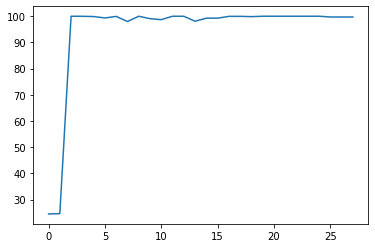

In [31]:
plt.plot(betrouwbaarheid)

In [32]:
betrouwbaarheid

[24.520522843879792,
 24.630466650378697,
 100.00305418117402,
 99.98854883742642,
 99.8931623931624,
 99.35412060128431,
 99.93884860662182,
 98.00052849467102,
 100.00152692736405,
 99.08272909932734,
 98.70674589304438,
 100.00152690404936,
 100.00152685742205,
 98.09906250954286,
 99.27314927925727,
 99.27314927925727,
 99.96335206450037,
 99.96335206450037,
 99.85340825800147,
 100.0061076161974,
 100.00610798924994,
 100.00610798924994,
 100.00610798924994,
 100.00610798924994,
 100.00611882763262,
 99.71903249450281,
 99.71292450525287,
 99.71292450525287]

In [33]:
lijst_landen = [
    'fr',
    'fr',
    'be',
    'be' ,
    'be' ,
    'de' ,
    'de' ,
    'at' ,
    'at' ,
    'at' ,
    'nl' ,
    'nl',
    'hu' ,
    'ro' ,
    'dk1',
    'dk2',
    'no1' ,
    'no2' ,
    'es' ,
    'fi' ,
    'pl' ,
    'se4',
    'se3',
    'se2' ,
    'ch',
    'sk' ,
    'it_cs', 
    'it_no' 
    
]


In [34]:
lijst_provider = [
    
    'RTE',
    'ENTSOE-FTP',
    'ENTSOE-FTP',
    'ELIA' ,
    'EEX' ,
    'ENTSOE_FTP' ,
    'EEX' ,
    'APG' ,
    'ENTSOE_FTP' ,
    'EEX' ,
    'EEX' ,
    'ENTSOE_FTP',
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP' ,
    'ENTSOE_FTP', 
    'ENTSOE_FTP' 
]

# Tabel met scores van reliability en accuracy

In [35]:
dfScores_wind = pd.DataFrame(lijst_landen, columns =['area_code'])
dfScores_wind['provider'] = pd.DataFrame(lijst_provider)
dfScores_wind['reliability'] = pd.DataFrame(betrouwbaarheid)
dfScores_wind['accuracy'] = pd.DataFrame(accuracy_list)

In [36]:
dfScores_wind

,area_code,provider,reliability,accuracy
0,fr,RTE,24.520523,11.791729
1,fr,ENTSOE-FTP,24.630467,11.795035
2,be,ENTSOE-FTP,100.003054,25.169967
3,be,ELIA,99.988549,35.769359
4,be,EEX,99.893162,25.404688
5,de,ENTSOE_FTP,99.354121,10.650987
6,de,EEX,99.938849,21.351069
7,at,APG,98.000528,37.719477
8,at,ENTSOE_FTP,100.001527,25.201874
9,at,EEX,99.082729,40.995911
